In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

In [3]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [4]:
# Quick overview of the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Feature Selection Techniques

### 1. Correlation Coefficient (Pearson)

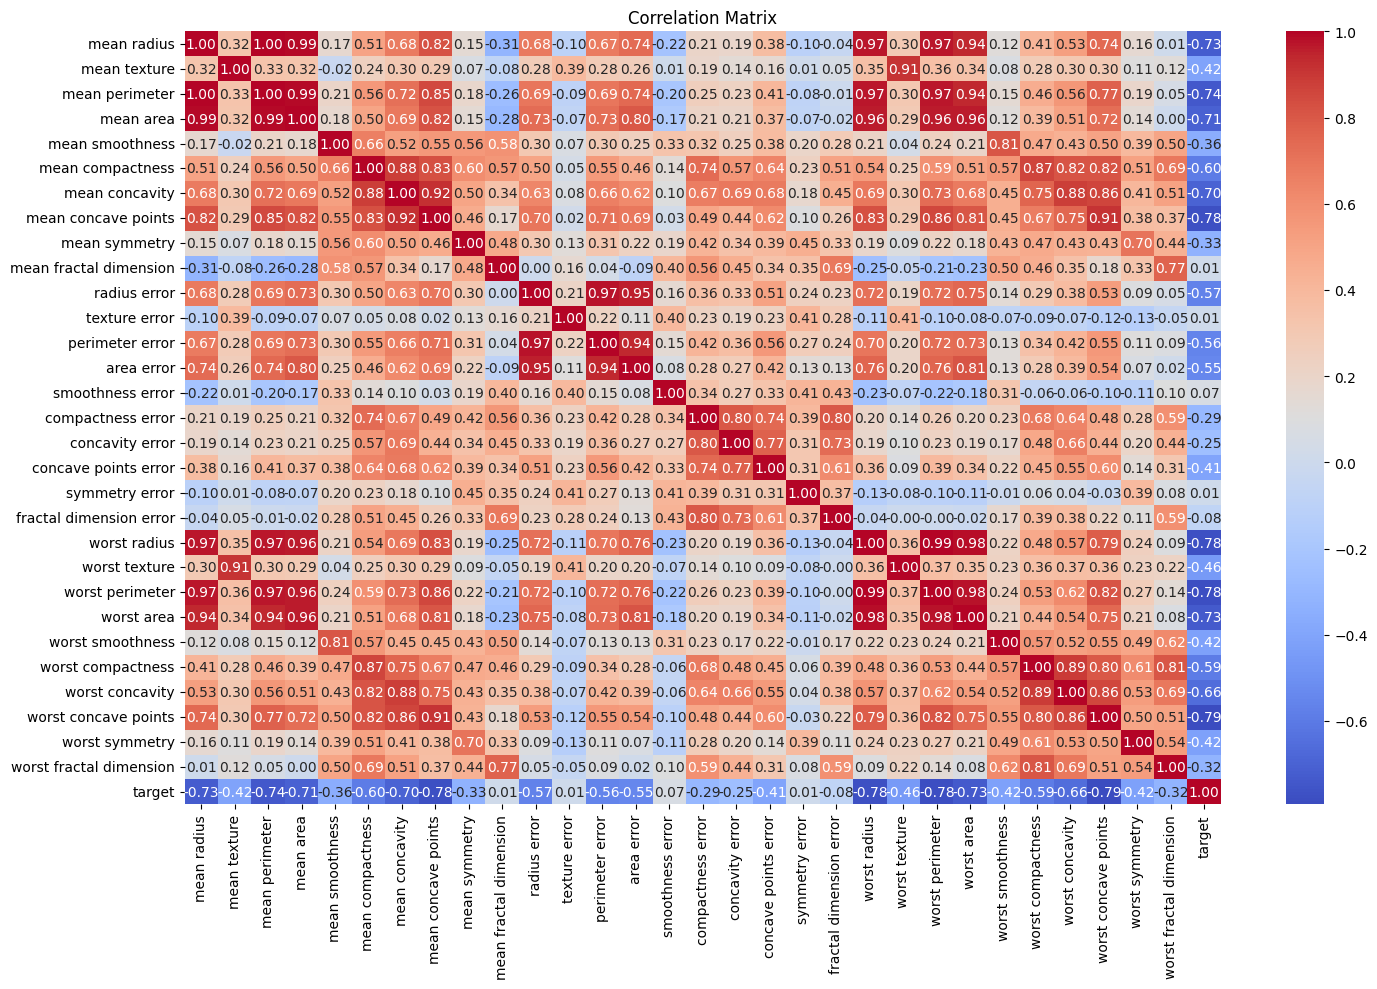

In [7]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

### 2. Chi-Squared Test

                    Feature     Chi2 Score        p-value
0               mean radius     266.104917   8.013976e-60
1              mean texture      93.897508   3.322922e-22
2            mean perimeter    2011.102864   0.000000e+00
3                 mean area   53991.655924   0.000000e+00
4           mean smoothness       0.149899   6.986316e-01
5          mean compactness       5.403075   2.010130e-02
6            mean concavity      19.712354   9.001757e-06
7       mean concave points      10.544035   1.165636e-03
8             mean symmetry       0.257380   6.119260e-01
9    mean fractal dimension       0.000074   9.931222e-01
10             radius error      34.675247   3.895534e-09
11            texture error       0.009794   9.211682e-01
12          perimeter error     250.571896   1.948775e-56
13               area error    8758.504705   0.000000e+00
14         smoothness error       0.003266   9.544251e-01
15        compactness error       0.613785   4.333661e-01
16          co

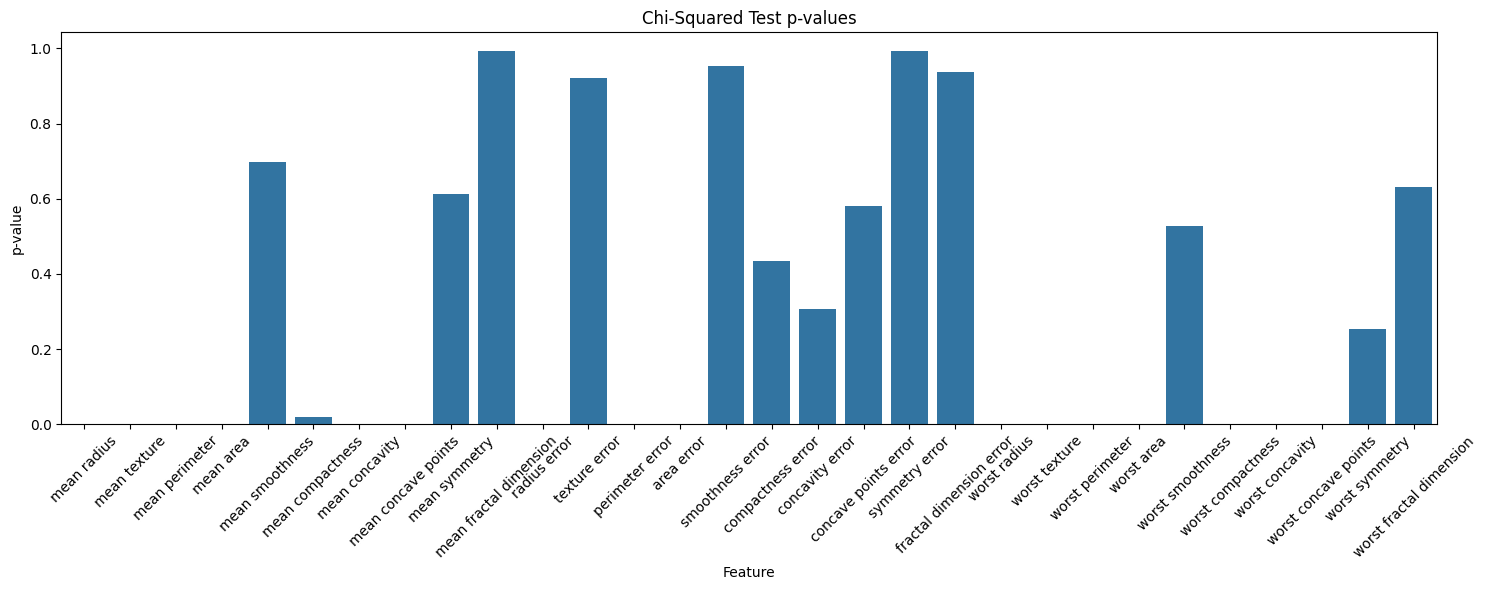

In [10]:
# Encoding categorical variables if needed (example for a binary target)
target = 'target'  # Replace with your actual target column name
X = df.drop(columns=[target])
y = df[target]

# Encode categorical features if necessary
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Chi-squared test
chi_scores, p_values = chi2(X, y)

# Results as DataFrame
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores, 'p-value': p_values})
print(chi2_results)

# Plotting the p-values
plt.figure(figsize=(15, 6))
sns.barplot(x='Feature', y='p-value', data=chi2_results)
plt.xticks(rotation=45)
plt.title('Chi-Squared Test p-values')
plt.tight_layout()
plt.savefig('chi_squared_results.png')
plt.show()

### 3. Mutual Information

                    Feature  Mutual Information
22          worst perimeter            0.471744
23               worst area            0.464704
20             worst radius            0.452153
7       mean concave points            0.442131
27     worst concave points            0.436595
2            mean perimeter            0.404833
6            mean concavity            0.372826
0               mean radius            0.366201
3                 mean area            0.359772
13               area error            0.340993
26          worst concavity            0.314870
12          perimeter error            0.277206
10             radius error            0.248805
25        worst compactness            0.224732
5          mean compactness            0.211495
17     concave points error            0.127809
21            worst texture            0.122484
16          concavity error            0.117126
24         worst smoothness            0.097345
28           worst symmetry            0

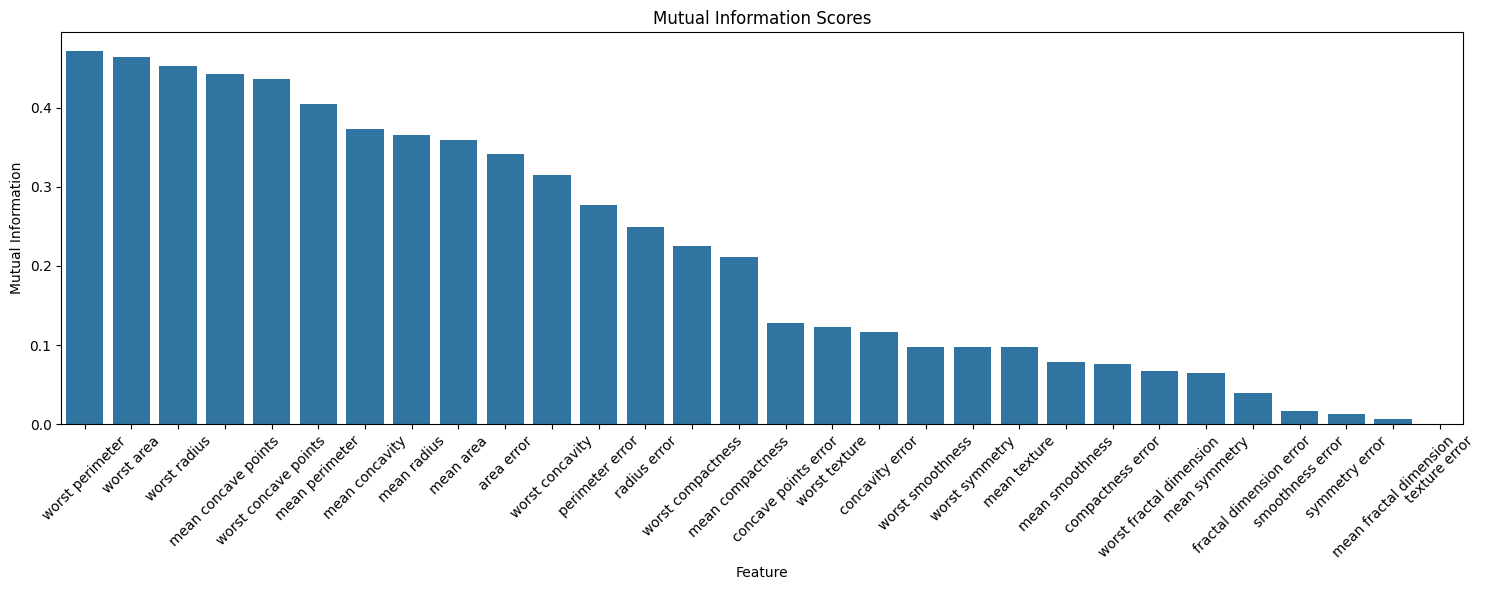

In [12]:
# Mutual Information calculation
mutual_info = mutual_info_classif(X, y)
mutual_info_results = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})

# Sort by mutual information score
mutual_info_results = mutual_info_results.sort_values(by='Mutual Information', ascending=False)
print(mutual_info_results)

# Plotting mutual information
plt.figure(figsize=(15, 6))
sns.barplot(x='Feature', y='Mutual Information', data=mutual_info_results)
plt.xticks(rotation=45)
plt.title('Mutual Information Scores')
plt.tight_layout()
plt.savefig('mutual_information.png')
plt.show()

# Comparison of Selected Features
## Model Performance Before and After Feature Selection

### 1. Train a Model with All Features

In [13]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training with all features
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
print("Performance with All Features:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Performance with All Features:
Accuracy: 0.9707602339181286
Precision: 0.963963963963964
Recall: 0.9907407407407407


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2. Train a Model After Feature Selection (Using Top Features from Mutual Information)

In [16]:
# Selecting top features based on mutual information
top_features = mutual_info_results['Feature'].head(10)  # Adjust number of features as needed
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Training with selected features
model.fit(X_train_selected, y_train)
y_pred_selected = model.predict(X_test_selected)

# Evaluation metrics
print("Performance with Selected Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_selected))
print("Precision:", precision_score(y_test, y_pred_selected))
print("Recall:", recall_score(y_test, y_pred_selected))

Performance with Selected Features:
Accuracy: 0.9824561403508771
Precision: 0.981651376146789
Recall: 0.9907407407407407


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
